## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [3]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [4]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [5]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [6]:
ds = pd.concat([train, test]) # Если понадобится полный датасет

In [7]:
train.isnull().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [8]:
test.isnull().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [9]:
if not ds.isna().any().any():
    print("There are no empty values in the dataset")

There are no empty values in the dataset


**Вывод**: в датасете нет пропусков ни в _train_, ни в _test_

In [10]:
train[train.duplicated()]

Empty DataFrame
Columns: [tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), fBodyAcc-skewness()-X, subject, Activity]
Index: []

In [11]:
test[test.duplicated()]

Empty DataFrame
Columns: [tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), fBodyAcc-skewness()-X, subject, Activity]
Index: []

In [12]:
if not ds.duplicated().any():
    print("There are no duplicated values in the dataset")

There are no duplicated values in the dataset


**Вывод**: в датасете нет строк-дубликатов ни в _train_, ни в _test_

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [13]:
ds.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count        10299.000000           10299.000000         10299.000000   
mean            -0.548222              -0.730003             0.683762   
std              0.467094               0.306560             0.507052   
min             -1.000000              -1.000000            -1.000000   
25%             -0.981915              -0.990934             0.816634   
50%             -0.874635              -0.942678             0.928752   
75%             -0.120142              -0.477885             0.966557   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count      10299.000000                  10299.000000          10299.000000   
mean          -0.466732                     -0.857234             -0.496522   
std            0.538707                      0.215748              0.511158   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.935788                     -0.999443             -0.817288   
50%           -0.874825                     -0.984532             -0.715631   
75%           -0.014641                     -0.777478             -0.521503   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count          10299.000000          10299.000000           10299.000000   
mean               0.063255             -0.054284              -0.135853   
std                0.305468              0.268898               0.400580   
min               -1.000000             -1.000000              -1.000000   
25%                0.002151             -0.131880              -0.489322   
50%                0.182028             -0.003882              -0.173507   
75%                0.250790              0.102970               0.152173   
max                1.000000              1.000000               1.000000   

            subject  
count  10299.000000  
mean      16.146422  
std        8.679067  
min        1.000000  
25%        9.000000  
50%       17.000000  
75%       24.000000  
max       30.000000

In [14]:
ds.sample(n=10, random_state=42)

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
5804           -0.207719              -0.321660             0.977912   
3688           -0.990814              -0.988588            -0.424598   
8              -0.988446              -0.994160             0.945366   
3437           -0.982383              -0.995881             0.945150   
841            -0.028018              -0.437942             0.937455   
2139           -0.316403              -0.657311             0.923434   
932            -0.096834              -0.212847             0.983018   
33             -0.915954              -0.996644             0.624988   
304            -0.147532              -0.645930             0.889946   
684            -0.913430              -0.917621            -0.735278   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
5804          0.046627                     -0.887841             -0.843964   
3688         -0.938192                     -0.999689              0.592963   
8            -0.941263                     -0.999696             -0.685390   
3437         -0.940314                     -0.999142             -0.704093   
841          -0.095405                     -0.444060             -0.751484   
2139         -0.061168                     -0.788322             -0.661600   
932          -0.080226                     -0.887757             -0.879630   
33           -0.916064                     -0.996641             -0.305884   
304          -0.161963                     -0.427674             -0.630837   
684          -0.782252                     -0.997491              0.809567   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
5804              0.187828             -0.044740              -0.208621   
3688             -0.576030             -0.428127              -0.437848   
8                 0.299394             -0.065491              -0.493397   
3437              0.297943              0.061830              -0.293870   
841               0.069695              0.196049              -0.021226   
2139              0.269784              0.180109              -0.277812   
932               0.180930              0.008458              -0.267862   
33               -0.213339             -0.337001               0.528699   
304               0.336294              0.109246               0.120291   
684              -0.055822             -0.903244               0.123413   

      subject          Activity  
5804       26           WALKING  
3688       19            LAYING  
8           2          STANDING  
3437       17          STANDING  
841         9           WALKING  
2139       18           WALKING  
932         5           WALKING  
33          1           SITTING  
304         1  WALKING_UPSTAIRS  
684         9            LAYING

In [15]:
ds["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Видно, что в датасете во всех столбцах, кроме двух последних, представлены числовые данные в диапазоне от $-1$ до $1$. У большинства признаков есть чётко выраженное медианное значение (например, медианное значение `fBodyAcc-bandsEnergy()-1,8.2` равно $\approx -0.98$), которое в совокупности с небольшим стандартным отклонением позволяет утверждать, что как правило признак принимает не сильно изменяющиеся значения.

В столбце `subject` содержатся номера испытуемых, их общее число, согласно статистике датасета, равно $30$.
В последнем столбце `Activity` содержатся искомые значения физической активности испытуемых, их $6$ видов.

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [16]:
train["Activity"].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [17]:
test["Activity"].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

Самая крупная категория как в _train_, так и в _test_ датасете $-$ это `LAYING`.
Самая маленькая категория как в _train_, так и в _test_ датасете $-$ это `WALKING_DOWNSTAIRS`.

In [18]:
vc = train["Activity"].value_counts()
print(
    "Difference between `LAYING` and `WALKING_DOWNSTAIRS` in train set is "
    f"{100 * (vc.max() - vc.min()) / vc.max():.0f}%"
)

Difference between `LAYING` and `WALKING_DOWNSTAIRS` in train set is 30%


In [19]:
vc = test["Activity"].value_counts()
print(
    "Difference between `LAYING` and `WALKING_DOWNSTAIRS` in test set is "
    f"{100 * (vc.max() - vc.min()) / vc.max():.0f}%"
)

Difference between `LAYING` and `WALKING_DOWNSTAIRS` in test set is 22%


Так как разница между категориями `LAYING` и `WALKING_DOWNSTAIRS` в _train_ и _test_ не превышает $30$%, то будем считать, что данные сбалансированы. (Хотя, по-честному, в _train_ разница составляет $29.92$%, но кого это интересует...)

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков $\sout{\text{(включая таргет)}}$ со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [20]:
ds.drop(['Activity'], axis=1).corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.907860   
tBodyGyroJerk-mad()-X                   0.907860               1.000000   
tGravityAcc-min()-X                     0.379357               0.383036   
tBodyAcc-max()-X                        0.960829               0.884093   
fBodyAcc-bandsEnergy()-1,8.2            0.706389               0.527772   
angle(X,gravityMean)                   -0.378236              -0.382767   
angle(Y,gravityMean)                    0.477408               0.460751   
angle(Z,gravityMean)                    0.425552               0.377753   
fBodyAcc-skewness()-X                   0.376188               0.269319   
subject                                -0.064583              -0.098032   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.379357          0.960829   
tBodyGyroJerk-mad()-X                    0.383036          0.884093   
tGravityAcc-min()-X                      1.000000          0.382164   
tBodyAcc-max()-X                         0.382164          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.247953          0.625268   
angle(X,gravityMean)                    -0.988757         -0.384244   
angle(Y,gravityMean)                     0.766217          0.458832   
angle(Z,gravityMean)                     0.657810          0.402873   
fBodyAcc-skewness()-X                   -0.255381          0.336175   
subject                                 -0.034032         -0.058773   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.706389   
tBodyGyroJerk-mad()-X                             0.527772   
tGravityAcc-min()-X                               0.247953   
tBodyAcc-max()-X                                  0.625268   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.222956   
angle(Y,gravityMean)                              0.345741   
angle(Z,gravityMean)                              0.424546   
fBodyAcc-skewness()-X                             0.265970   
subject                                          -0.029409   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.378236              0.477408   
tBodyGyroJerk-mad()-X                    -0.382767              0.460751   
tGravityAcc-min()-X                      -0.988757              0.766217   
tBodyAcc-max()-X                         -0.384244              0.458832   
fBodyAcc-bandsEnergy()-1,8.2             -0.222956              0.345741   
angle(X,gravityMean)                      1.000000             -0.748249   
angle(Y,gravityMean)                     -0.748249              1.000000   
angle(Z,gravityMean)                     -0.635231              0.545614   
fBodyAcc-skewness()-X                     0.257497             -0.058940   
subject                                   0.025003             -0.024190   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyAccMag-mean()                        0.425552               0.376188   
tBodyGyroJerk-mad()-X                     0.377753               0.269319   
tGravityAcc-min()-X                       0.657810              -0.255381   
tBodyAcc-max()-X                          0.402873               0.336175   
fBodyAcc-bandsEnergy()-1,8.2              0.424546               0.265970   
angle(X,gravityMean)                     -0.635231               0.257497   
angle(Y,gravityMean)                      0.545614              -0.058940   
angle(Z,gravityMean)                      1.000000              -0.189980   
fBodyAcc-skewness()-X                    -0.189980               1.000000   
subject                                  -0.067160               0.024701   

                               subject  
tBodyAccMag-m

В первую очередь бросается в глаза тот факт, что корреляция между столбцами `angle(X,gravityMean)` и `tGravityAcc-min()-X` составляет почти $-1$, что достаточно легко объясняется: бОльшим значениям угла между осью $Х$ и усредненной гравитационной составляющей ускорения соответствуют меньшие значения минимума гравитационной составляющей ускорения по оси $Х$.

Также близкие к $-1$ коэффициенты корреляции у признаков `angle(Y,gravityMean)` и `angle(Z,gravityMean)` с признаком `angle(X,gravityMean)`, что тоже объяснимо природой этих характеристик $-$ они все связаны с гравитационной составляющей ускорения, разложенной по разным осям.

Ещё видно, что коэффициент корреляции у признаков `tBodyAcc-max()-X` и `tBodyAccMag-mean()` близок к $1$, это опять следствие схожей природы этих характеристик.

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

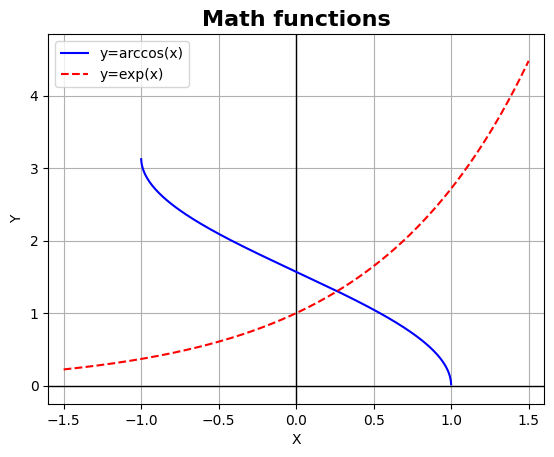

In [21]:
x = np.linspace(-1.5, 1.5, 10000)

plt.figure()
plt.grid(True, which='both')
plt.axhline(linewidth=1, color='black')
plt.axvline(linewidth=1, color='black')

plt.xlim([-1.6, 1.6])
plt.ylim([-0.25, 4.85])

plt.title('Math functions', fontweight='bold', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')

y1 = np.arccos(x)
plt.plot(x, y1, 'b', label = 'y=arccos(x)')

y2 = np.exp(x)
plt.plot(x, y2, 'r--', label = 'y=exp(x)')

plt.legend(loc='upper left')
plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

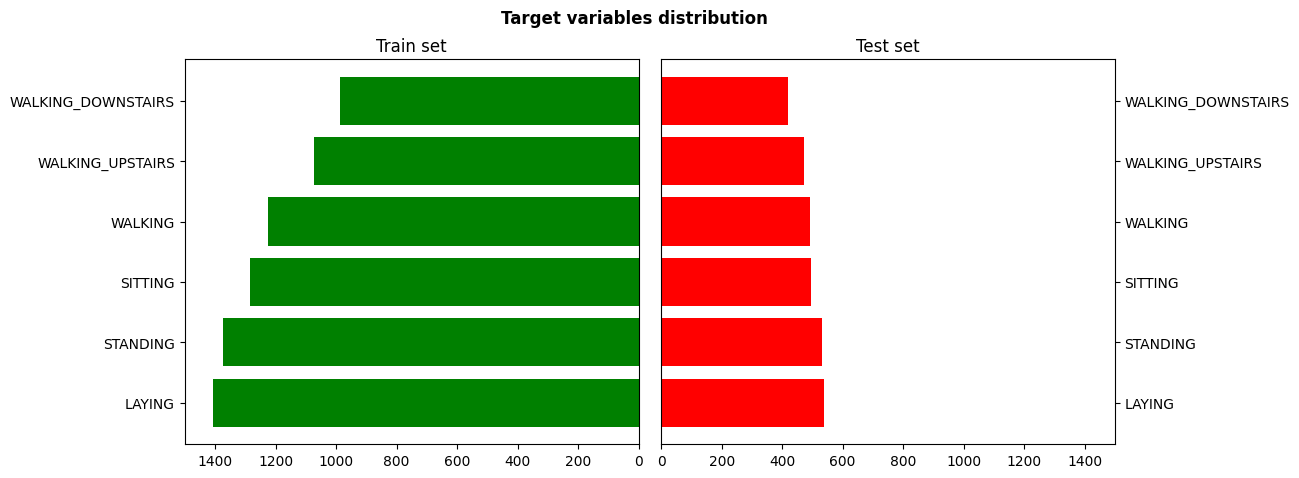

In [22]:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("Target variables distribution", fontweight="bold")

activities = ds["Activity"].value_counts().sort_values(ascending=False).index

ax = fig.add_subplot(1, 2, 1)
ax.barh(activities, train["Activity"].value_counts(), color="green")
ax.set_title("Train set")
ax.set_xlim(0, 1500)
ax.invert_xaxis()

ax = fig.add_subplot(1, 2, 2)
ax.barh(activities, test["Activity"].value_counts(), color="red")
ax.set_title("Test set")
ax.yaxis.tick_right()
ax.set_xlim(0, 1500)

plt.subplots_adjust(wspace=0.05)

plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

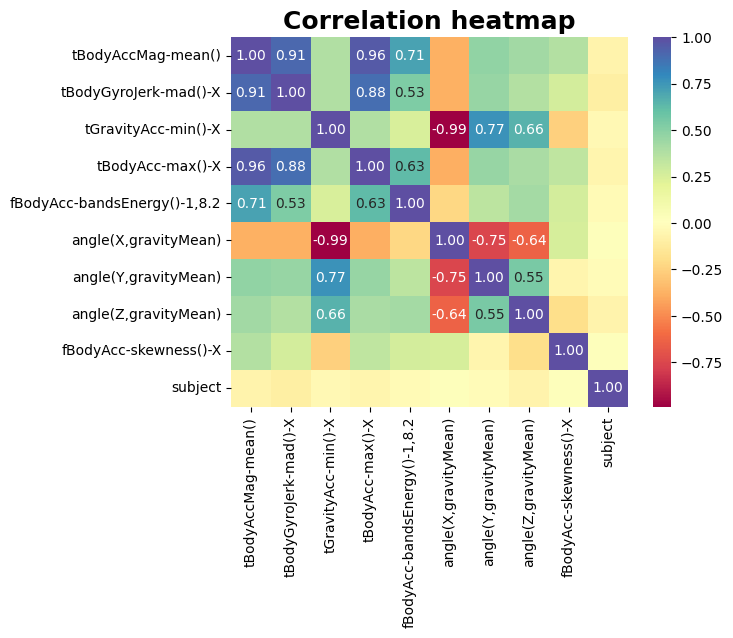

In [23]:
ax = sns.heatmap(ds.drop(['Activity'], axis=1).corr(), cmap="Spectral", annot=True, fmt="0.2f")
ax.set_title("Correlation heatmap", fontweight="bold", fontsize=18)

for cell in ax.texts:
    text = cell.get_text()
    if np.abs(float(text)) < 0.5:
        text = ""
    cell.set_text(text)

Как видно из `heatmap`, признак `subject` имеет околонулевые коэффициенты корреляции со всеми остальными признаками. Это объяснимо смыслом переменной $-$ номер испытуемого человека от $1$ до $30$ никак не связан с реальными измеренными характеристиками (все из которых нормализованы до диапазона $[-1; 1]$), поэтому имеет смысл исключить его из рассмотрения корреляций.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

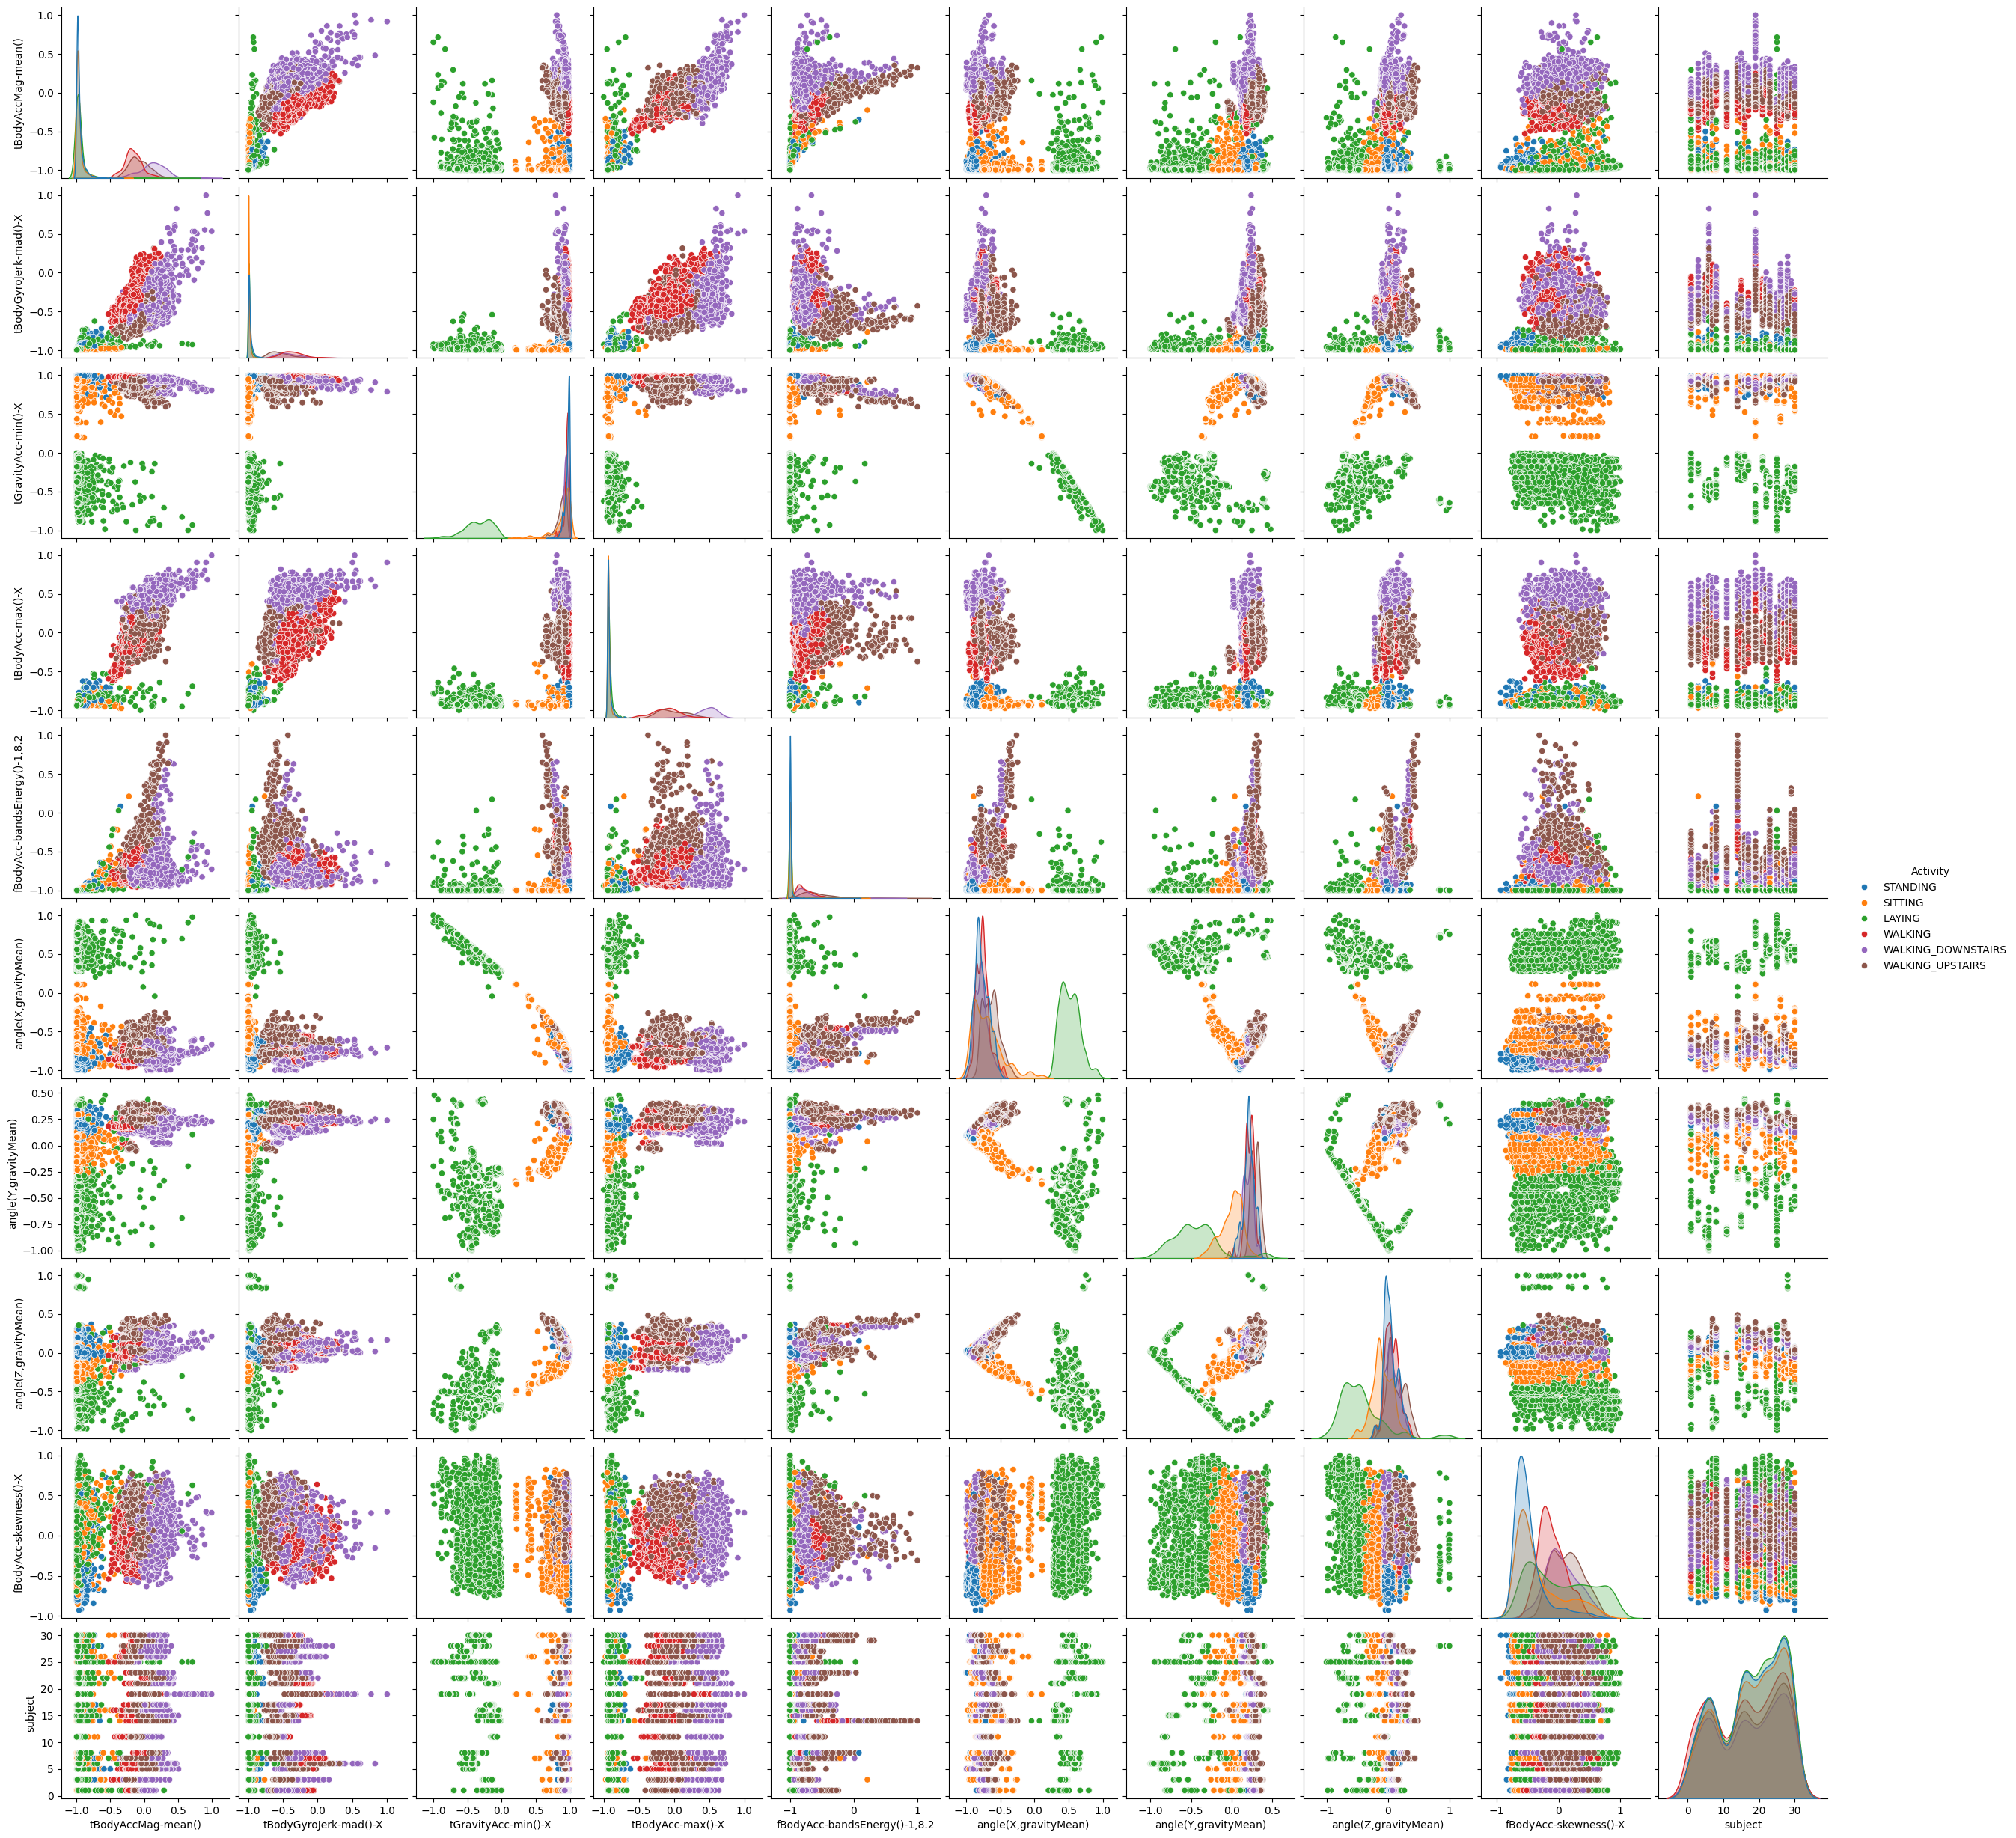

In [24]:
sns.pairplot(train, hue="Activity");

Во-первых, анализировать сразу $100$ графиков жутко неудобно :)

Во-вторых, оказалось, что из $30$ испытуемых про некоторых вообще нет данных $-$ то есть не все $30$ участников эксперимента попали в _train_ датасет.

В-третьих, у некоторых пар признаков обнаружилась интересная связь $-$ большинство семплов в _train_ датасете кластеризуются в некоторой области значений этих признаков.

Ну и в-четвертых, у некоторых пар признаков прослеживается кластеризация на $2$ группы, видимо относящихся к активностям более и менее затратным по энергии, поэтому стоит проверять такие гипотезы более точно и точечно.

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

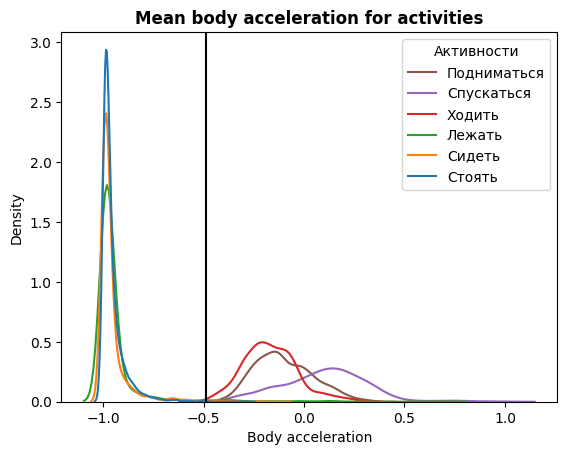

In [25]:
ax = sns.kdeplot(
    ds,
    x="tBodyAccMag-mean()",
    hue="Activity",
    legend=True,
)

ax.set_xlabel("Body acceleration")
ax.legend(["Подниматься", "Спускаться", "Ходить", "Лежать", "Сидеть", "Стоять"], title="Активности")
ax.set_title("Mean body acceleration for activities", fontweight="bold")

threshold = -0.49

plt.axvline(x=threshold, color='black', linestyle='-');

In [26]:
print(
    "Accuracy by threshold:",
    f"{
        (
            ds["Activity"].apply(
                lambda x: 1 if x.startswith("WALKING") else 0
            ) == \
            ds["tBodyAccMag-mean()"].apply(
                lambda x: 1 if x > threshold else 0
            )
        ).mean():.2%}"
)

Accuracy by threshold: 99.37%


Я получил accuracy $99.37$%, то есть значение `tBodyAccMag-mean()` $= -0.49$ очень точно разделяет "динамические" и "статические" активности. Простота нахождения такого значения объясняется природой признака $-$ очевидно, что среднее ускорение тела будет сильно больше у активностей, требующих движения (ходьба, спуск и подъём по лестнице).

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

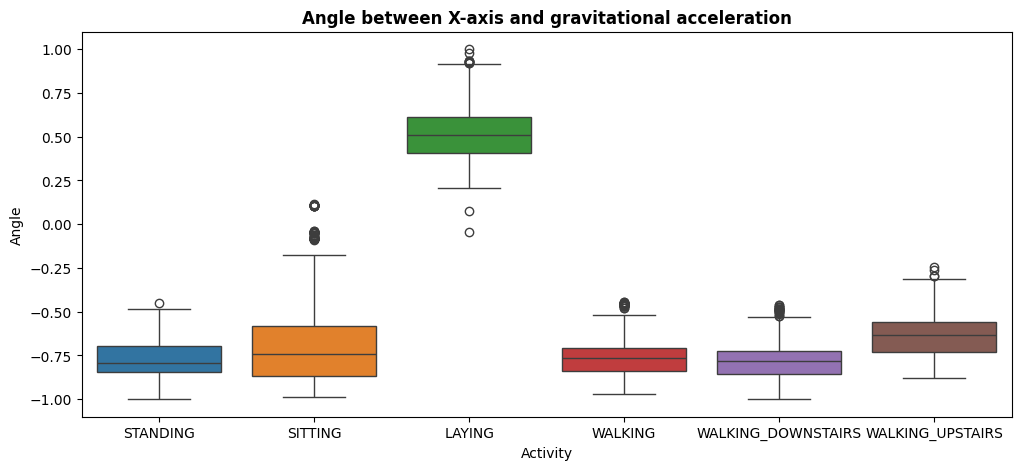

In [27]:
plt.figure(figsize=(12, 5))

ax = sns.boxplot(
    train,
    x="Activity",
    y="angle(X,gravityMean)",
    palette=sns.color_palette(),
)

ax.set_title("Angle between X-axis and gravitational acceleration", fontweight="bold")
ax.set_ylabel("Angle");

Легко увидеть кардинальное отличие boxplot-а у активности `LAYING` $-$ знак угла между осью $X$ и гравитационной составляющей ускорения отличается от всех остальных активностей. Вероятно, это связано с изначальным выбором направления оси $X$ $-$ в лежачем положении гравитационная составляющая ускорения образует положительный угол с положительным направлением оси $X$, в отличие от всех остальных положений тела.

Также среди "динамических" активностей можно увидеть, что абсолютное значение `angle(X,gravityMean)` у активности `WALKING_UPSTAIRS` как правило меньше всего. Возможно, это также связано с выбором направления оси $X$, в частности, при подъёме по лестнице наверх, угол между осью и гравитационной составляющей ускорения оказывается меньше (по модулю).

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

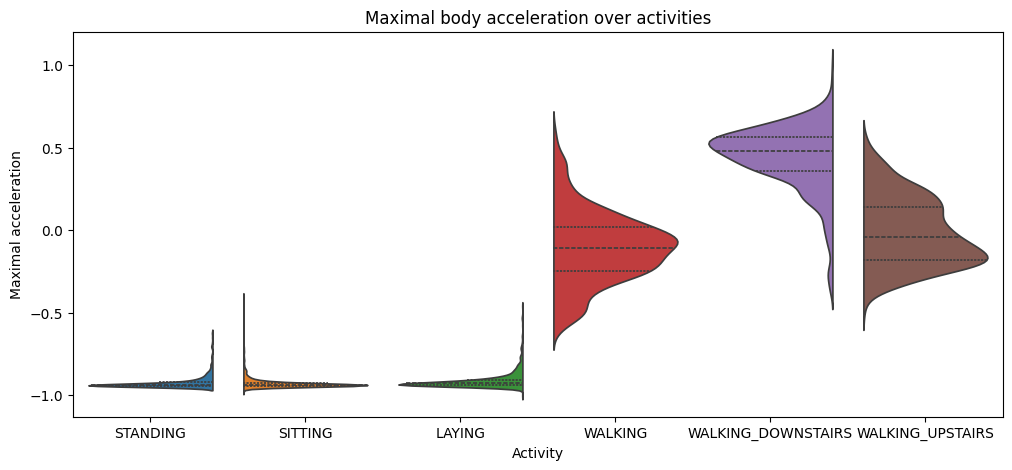

In [28]:
plt.figure(figsize=(12, 5))

ax = sns.violinplot(
    train,
    x="Activity",
    y="tBodyAcc-max()-X",
    palette=sns.color_palette(),
    split=True,
    inner="quart",
)

ax.set_title("Maximal body acceleration over activities")
ax.set_xlabel("Activity")
ax.set_ylabel("Maximal acceleration");

Можно с достаточно высокой точностью утверждать, что максимальное ускорение тела наибольшее при спуске по лестнице вниз, так что отсюда можно отделить активность `WALKING_DOWNSTAIRS` по признаку `tBodyAcc-max()-X`. Логически это объясняется тем, что при спуске с лестницы человеку проще всего набирать более высокую скорость, поэтому и максимальное ускорение его тела при данной активности действительно максимальное среди рассматриваемых активностей.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

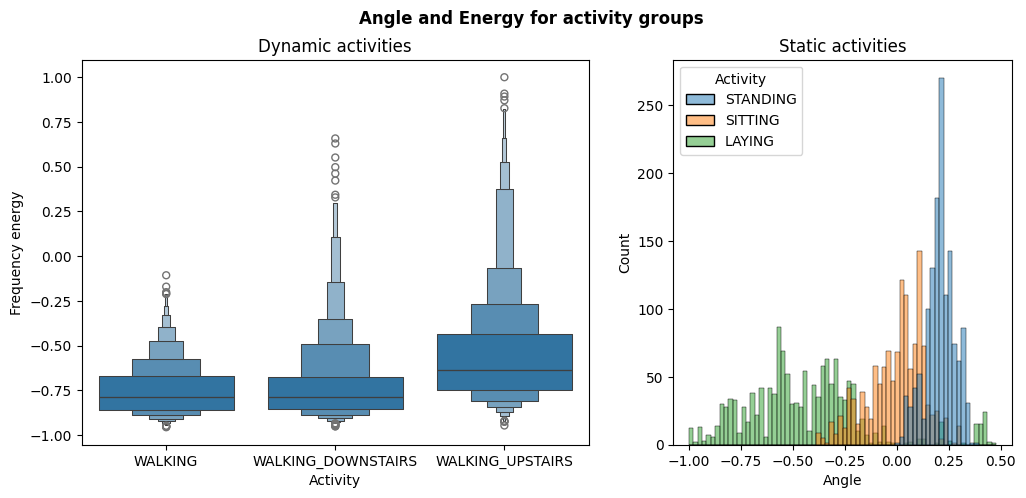

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), width_ratios = [3, 2])
fig.suptitle("Angle and Energy for activity groups", fontweight="bold")

ax1, ax2 = axs

ax1.set_title("Dynamic activities")
ax2.set_title("Static activities")

sns.boxenplot(
    pd.concat([train[train["Activity"] == "WALKING"], train[train["Activity"] == "WALKING_DOWNSTAIRS"], train[train["Activity"] == "WALKING_UPSTAIRS"]]),
    ax=ax1,
    x="Activity",
    y="fBodyAcc-bandsEnergy()-1,8.2",
)

sns.histplot(
    pd.concat([train[train["Activity"] == "STANDING"], train[train["Activity"] == "SITTING"], train[train["Activity"] == "LAYING"]]),
    ax=ax2,
    x="angle(Y,gravityMean)",
    hue="Activity",
    bins=70
)

ax1.set_ylabel("Frequency energy")
ax2.set_xlabel("Angle");

На левом графике можно увидеть, что большинство значений `fBodyAcc-bandsEnergy()-1,8.2` у записей, соответствующих подъёму по лестнице наверх, больше, чем у остальных "динамических" активностей.

По правому графику нельзя сделать однозначный вывод о каких-либо пороговых значениях `angle(Y,gravityMean)` для разделения "статических" активностей между собой, поскольку очень многие значения этого признака могут присутствовать в записях различных активностей.

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

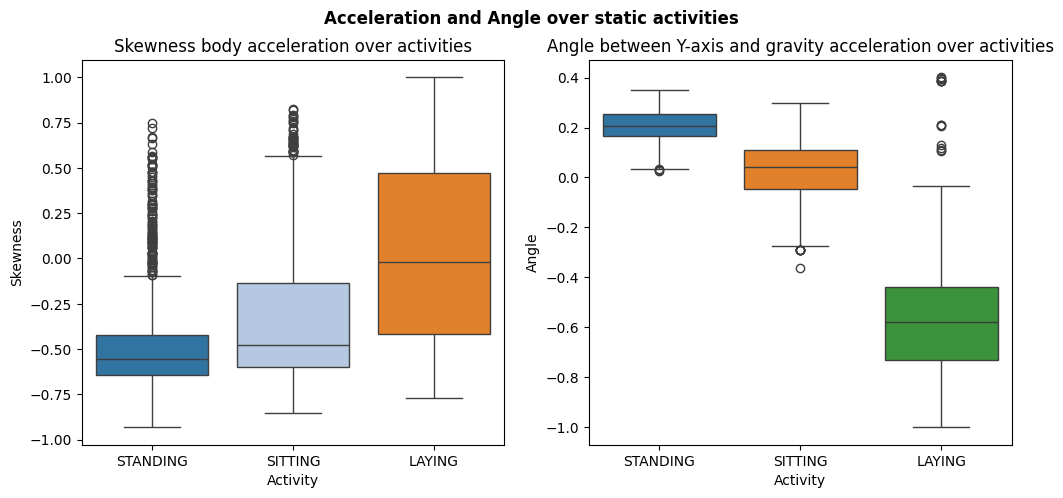

In [30]:
plt.figure(figsize=(12, 5))
plt.suptitle("Acceleration and Angle over static activities", fontweight="bold")

static_activities = pd.concat([train[train["Activity"] == "STANDING"], train[train["Activity"] == "SITTING"], train[train["Activity"] == "LAYING"]])

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

sns.boxplot(
    static_activities,
    x="Activity",
    y="fBodyAcc-skewness()-X",
    ax=ax1,
    palette=sns.color_palette("tab20"),
)

sns.boxplot(
    static_activities[static_activities["fBodyAcc-skewness()-X"] < -0.376],
    x="Activity",
    y="angle(Y,gravityMean)",
    ax=ax2,
    palette=sns.color_palette(),
)

ax1.set_title("Skewness body acceleration over activities")
ax2.set_title("Angle between Y-axis and gravity acceleration over activities")

ax1.set_ylabel("Skewness")
ax2.set_ylabel("Angle");

Если выделить среди статических активностей те, у которых `fBodyAcc-skewness()-X` $> -0.376$, то можно достаточно точно определить вид активности по значению `angle(Y,gravityMean)`. В особенности отделяется уже известная категория `LAYING`, но в целом можно провести границу и между `STANDING` и `SITTING`.

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

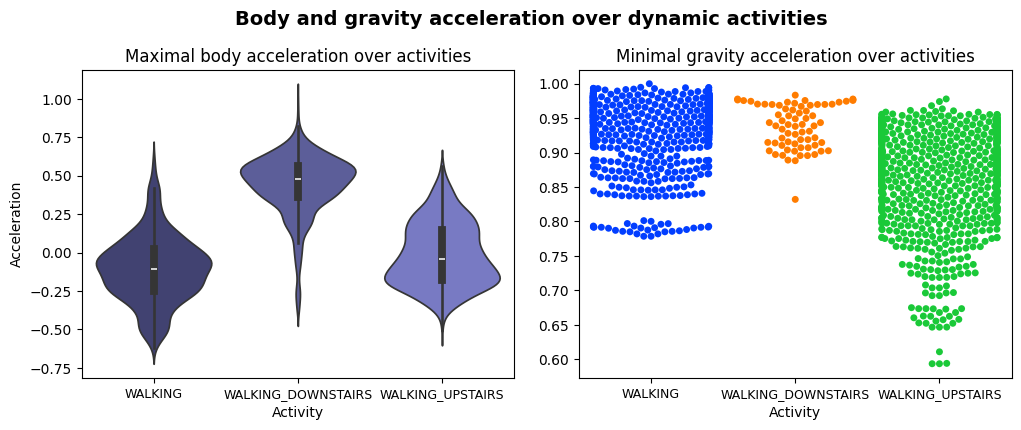

In [31]:
plt.figure(figsize=(12, 4))
plt.suptitle("Body and gravity acceleration over dynamic activities", fontweight="bold", fontsize=14, y=1.03)

dynamic_activities = pd.concat([train[train["Activity"] == "WALKING"], train[train["Activity"] == "WALKING_DOWNSTAIRS"], train[train["Activity"] == "WALKING_UPSTAIRS"]])

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Maximal body acceleration over activities")
sns.violinplot(
    dynamic_activities,
    x="Activity",
    y="tBodyAcc-max()-X",
    ax=ax1,
    palette=sns.color_palette("tab20b"),
)
ax1.set_ylabel("Acceleration")
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=9)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Minimal gravity acceleration over activities")
sns.swarmplot(
    dynamic_activities[dynamic_activities["tBodyAcc-max()-X"] < 0.157],
    x="Activity",
    y="tGravityAcc-min()-X",
    ax=ax2,
    palette=sns.color_palette("bright"),
)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=9)

ax2.set_ylabel("")

plt.subplots_adjust(wspace=0.15);

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [32]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: total: 8min 18s
Wall time: 27.6 s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [33]:
import plotly.express as px

px.scatter(
    df_2_comp,
    x="x",
    y="y",
    color="Activity",
)

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [34]:
px.scatter_3d(
    df_3_comp,
    x="x",
    y="y",
    z="z",
    color="Activity",
)

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [35]:
def predict(df: pd.DataFrame) -> pd.Series:
    activity = pd.Series("WALKING", index=df.index)

    static_mask = df["tBodyAccMag-mean()"] < -0.49
    dynamic_mask = ~static_mask

    laying_mask = static_mask & (df["angle(X,gravityMean)"] > 0.125)
    standing_mask = static_mask & (df["fBodyAcc-skewness()-X"] < 0.625) & (df["angle(Y,gravityMean)"] > 0.0)
    sitting_mask = static_mask & (df["fBodyAcc-skewness()-X"] < 0.5) & (df["angle(Y,gravityMean)"] < 0.175) & (df["angle(Y,gravityMean)"] > -0.3)
    walking_upstairs_mask = dynamic_mask & (df["angle(X,gravityMean)"] > -0.7) & (df["fBodyAcc-bandsEnergy()-1,8.2"] > -0.7)
    walking_downstairs_mask = dynamic_mask & (df["tBodyAcc-max()-X"] > 0.2)

    activity[laying_mask] = "LAYING"
    activity[walking_upstairs_mask] = "WALKING_UPSTAIRS"
    activity[walking_downstairs_mask] = "WALKING_DOWNSTAIRS"
    activity[standing_mask] = "STANDING"
    activity[sitting_mask] = "SITTING"

    return activity


def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [36]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)*100:.0f}%")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)*100:.0f}%")

Accuracy on train set => 77%
Accuracy on test set => 71%


__Место для мема и/или фидбэка__

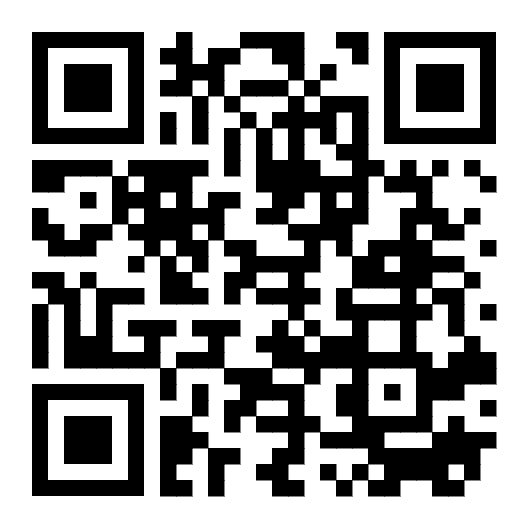